In [1]:
from skimage import data, io, draw
import skimage as ski
from skimage import feature
import cv2 as cv
import numpy as np

In [2]:
from os import listdir
from os.path import isfile, join

In [3]:
%matplotlib inline

In [4]:
def loadImgColor(path):
    img = cv.imread(path, cv.IMREAD_COLOR)
    return img

In [5]:
def loadImgGrey(path):
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    return img

In [6]:
def showImage(img):
    io.imshow(img)

In [7]:
def getFilesInDir(path):
    return [f for f in listdir(path) if isfile(join(path, f))]

In [8]:
pathHealthy = "F:\Polibuda\semestr6\informatyka w medycynie - lab\Badanie dna oka\healthy"
pathManual = "F:\Polibuda\semestr6\informatyka w medycynie - lab\Badanie dna oka\healthy_manualsegm"

In [9]:
healthyImages = getFilesInDir(pathHealthy)
healthyManual = getFilesInDir(pathManual)

In [10]:
healthyImages

['01_h.jpg',
 '02_h.jpg',
 '03_h.jpg',
 '04_h.jpg',
 '05_h.jpg',
 '06_h.jpg',
 '07_h.jpg',
 '08_h.jpg',
 '09_h.jpg',
 '10_h.jpg',
 '11_h.jpg',
 '12_h.jpg',
 '13_h.jpg',
 '14_h.jpg',
 '15_h.jpg']

In [11]:
healthyImages = [healthyImages[0], healthyImages[1]]

In [11]:
healthyImages

['01_h.jpg',
 '02_h.jpg',
 '03_h.jpg',
 '04_h.jpg',
 '05_h.jpg',
 '06_h.jpg',
 '07_h.jpg',
 '08_h.jpg',
 '09_h.jpg',
 '10_h.jpg',
 '11_h.jpg',
 '12_h.jpg',
 '13_h.jpg',
 '14_h.jpg',
 '15_h.jpg']

In [11]:
manualImages = []
for image in healthyManual:
    manualImages.append(loadImgColor(pathManual + "\\" + image))


In [12]:
images = []
for image in healthyImages:
    print(image)
    images.append(loadImgColor(pathHealthy + "\\" + image))




01_h.jpg
02_h.jpg
03_h.jpg
04_h.jpg
05_h.jpg
06_h.jpg
07_h.jpg
08_h.jpg
09_h.jpg
10_h.jpg
11_h.jpg
12_h.jpg
13_h.jpg
14_h.jpg
15_h.jpg


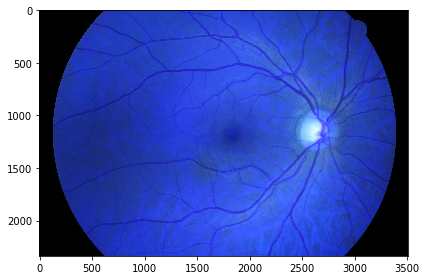

In [13]:
showImage(images[0])

In [14]:
images = list(map(lambda image:cv.cvtColor(image, cv.COLOR_BGR2RGB),images))


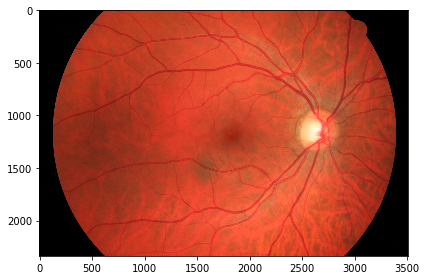

In [15]:
showImage(images[0])
    

In [16]:
def getGreenChannel(image):
    image[:, :, 0] = 0
    image[:, :, 2] = 0
    return image

In [18]:
#Get green channel
images = list(map(lambda image:getGreenChannel(image),images))

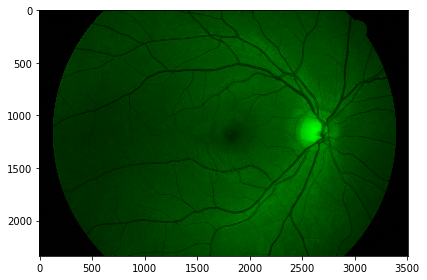

In [19]:
showImage(images[0])

In [20]:
#Convert to grey
images = list(map(lambda image:cv.cvtColor(image, cv.COLOR_BGR2GRAY),images))

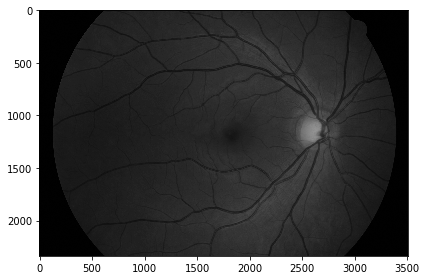

In [21]:
showImage(images[0])

In [22]:
from pylab import *

from skimage import img_as_float, img_as_ubyte

from matplotlib import pylab as plt
import numpy as np

In [23]:
def increaseContrast(image):
    image = img_as_float(image)
    MIN = 10 / 256
    MAX = 70 / 256

    norm = (image - MIN) / (MAX - MIN)
    norm[norm > 1] = 1
    norm[norm < 0] = 0
    
    return img_as_ubyte(norm)

In [24]:
#increase contrast
images = list(map(lambda image:increaseContrast(image),images))

e:\programy\python3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


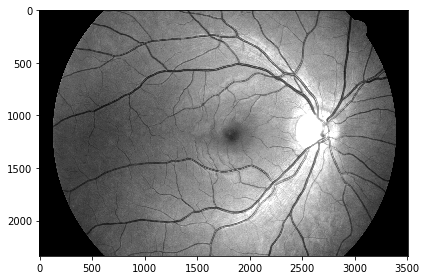

In [25]:
showImage(images[0])

In [26]:
#addaptive treshold
images = list(map(lambda image:cv.adaptiveThreshold(image,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,25,8),images))

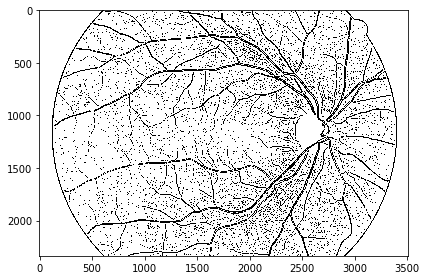

In [27]:
showImage(images[0])

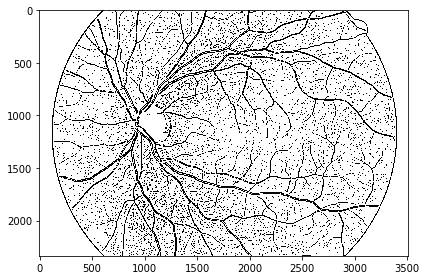

In [28]:
showImage(images[1])

In [29]:
kernel = np.ones((5,5), np.uint8) 

In [30]:
def clearVessels(image):
    img_dilation = cv.dilate(image, kernel, iterations=1) 
    img_erosion = cv.erode(img_dilation, kernel, iterations=2) 
    
    return img_erosion

In [31]:
print(len(originalImages))

NameError: name 'originalImages' is not defined

In [32]:
#erosion and dilatation
images = list(map(lambda image:clearVessels(image),images))

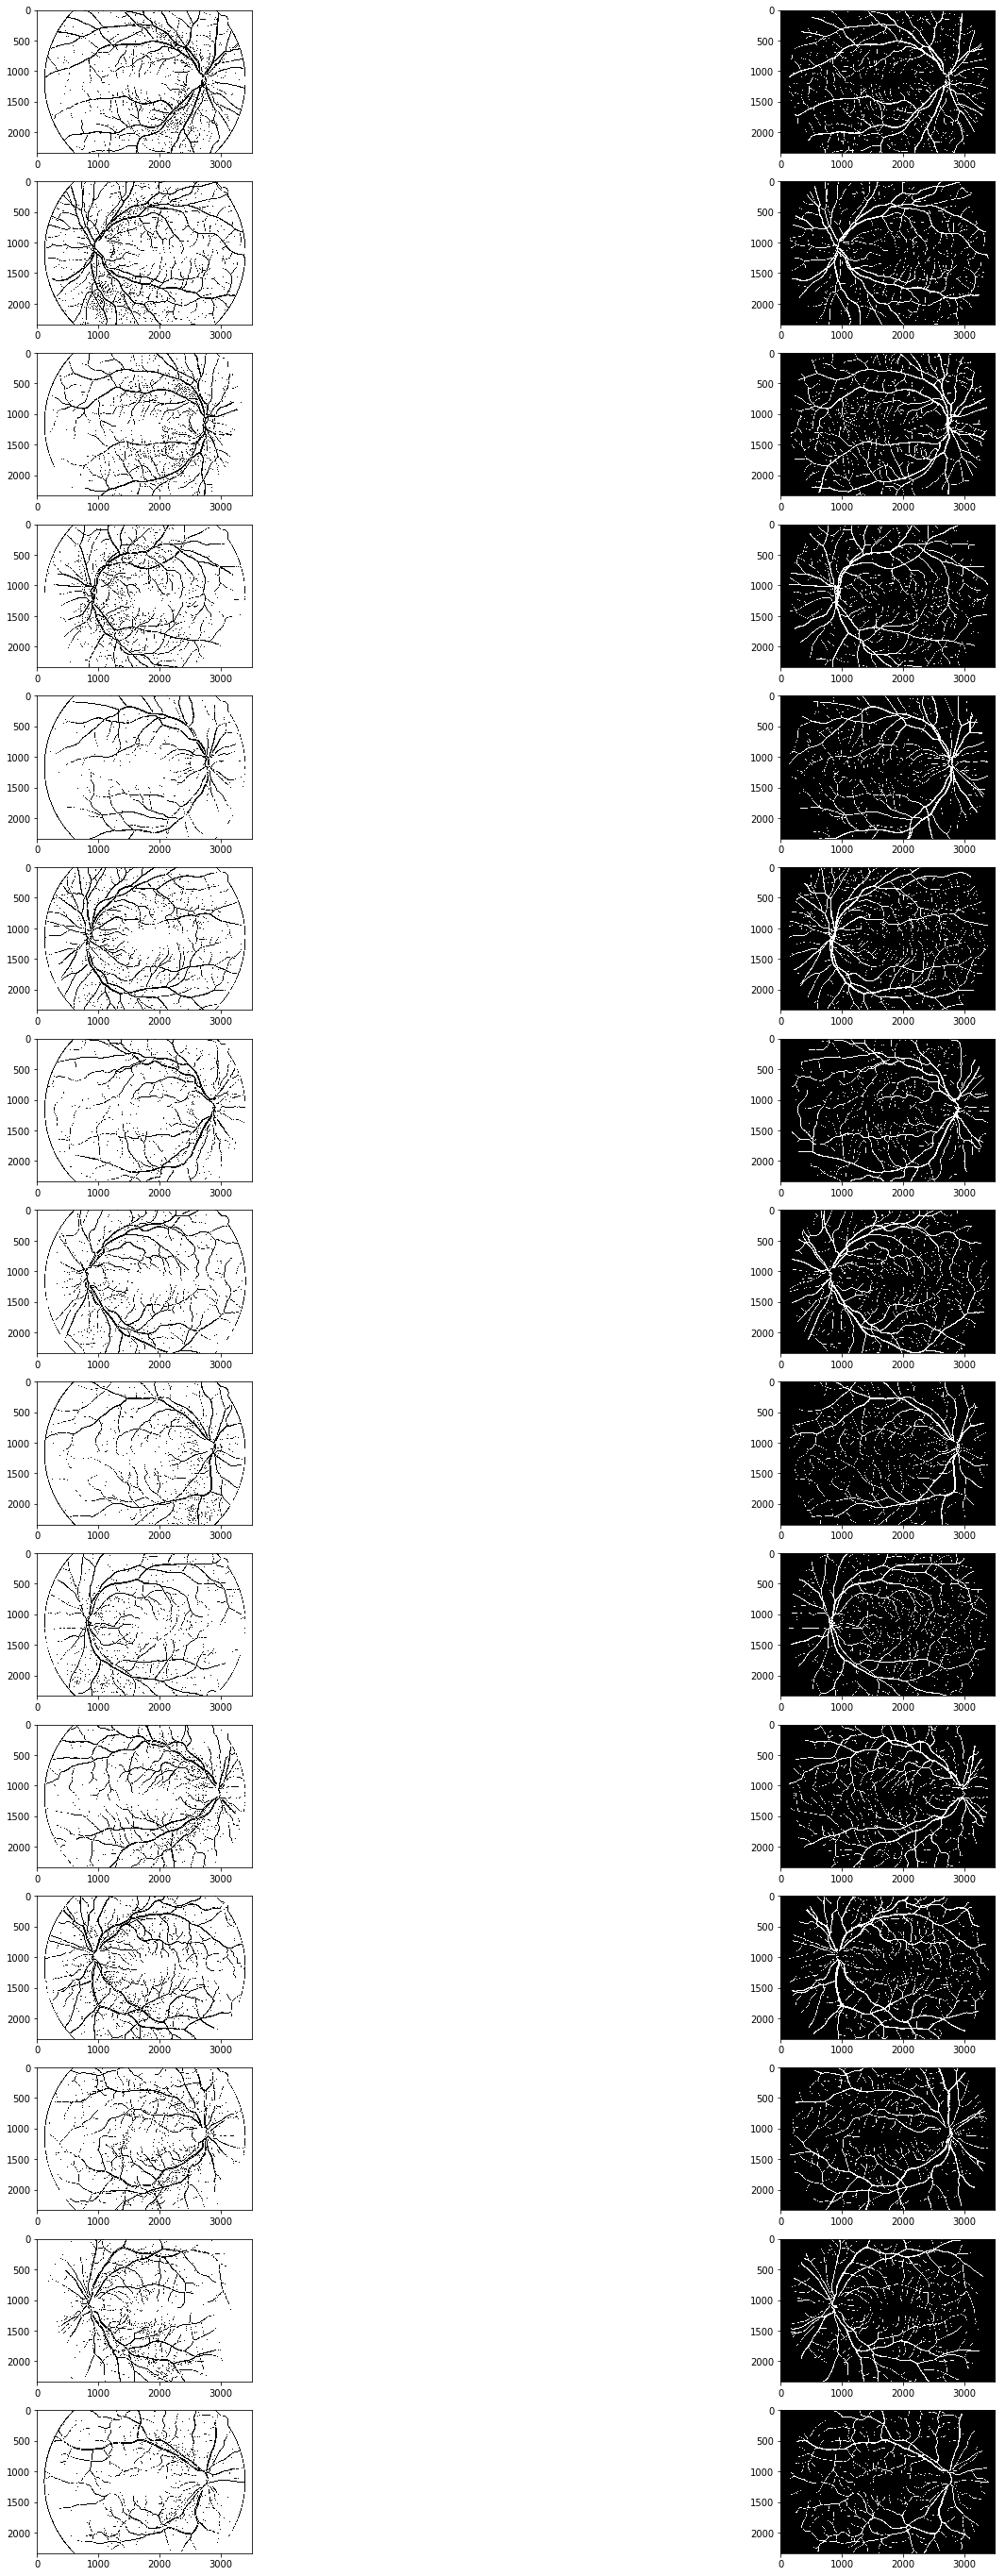

In [33]:
%matplotlib inline
figure(figsize=(20,200))


x = 0
for found, manual in zip(images, manualImages):

    subplot(4 * len(manualImages) , 3, 1 + (x * 3)); 
    plt.imshow(found, cmap='gray')
    
#    subplot(4 * len(originalImages), 3, 2 + (x * 3)); 
#    plt.imshow(original)
    
    subplot(4 * len(manualImages), 3, 3 + (x * 3)); 
    plt.imshow(manual)
    
    x += 1

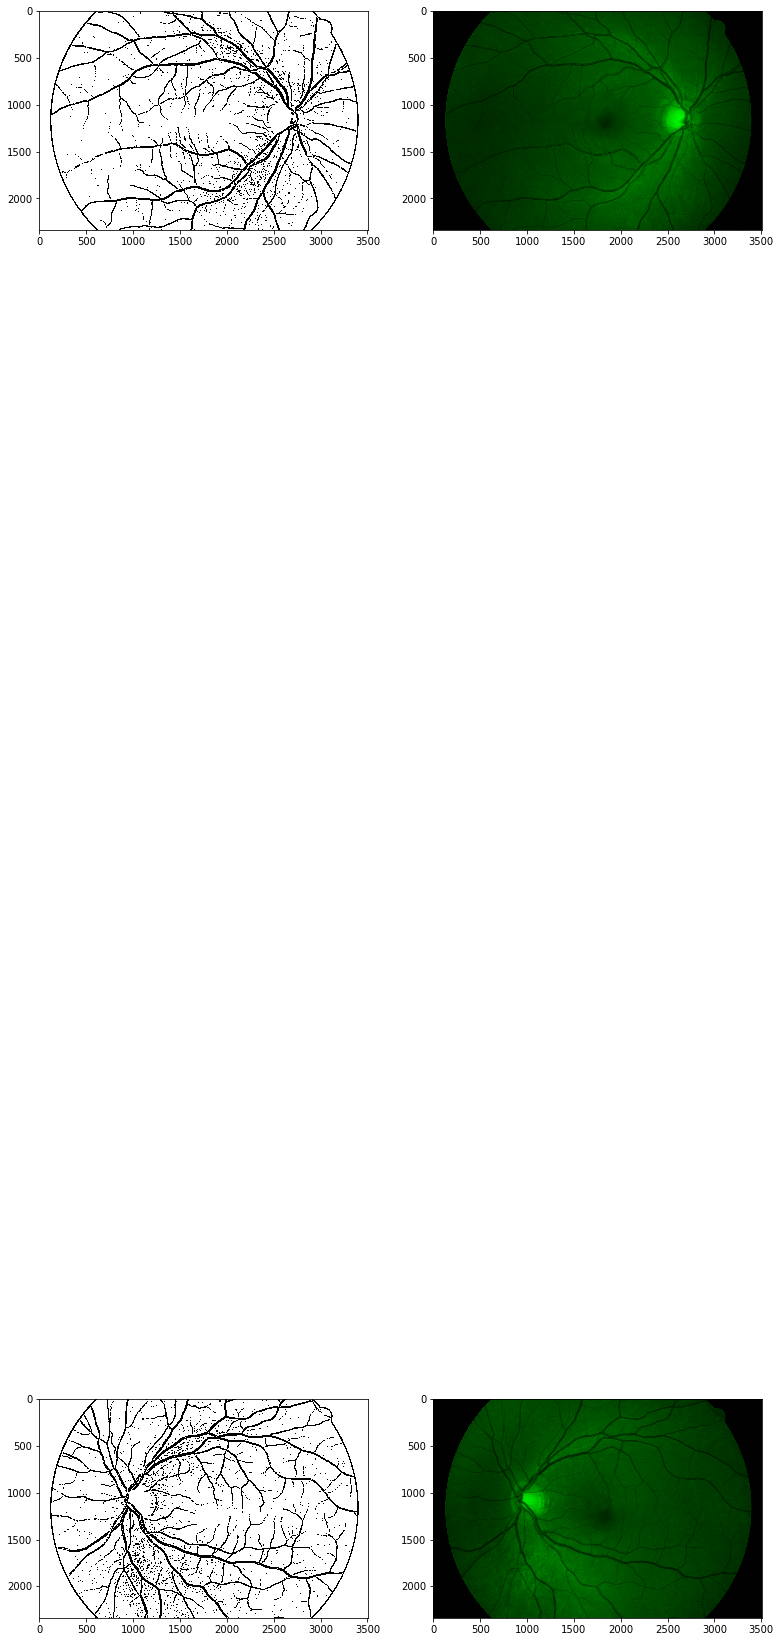

In [37]:
%matplotlib inline
figure(figsize=(20,200))


x = 0
for found, original, manual in zip(images, originalImages, manualImages):

    subplot(4 * len(originalImages) , 3, 1 + (x * 3)); 
    plt.imshow(found, cmap='gray')
    
    subplot(4 * len(originalImages), 3, 2 + (x * 3)); 
    plt.imshow(original)
    
#    subplot(4 * len(originalImages), 3, 3 + (x * 3)); 
#    plt.imshow(manual)
    
    x += 1

In [13]:
kernel = np.ones((3,3), np.uint8) 

In [ ]:
img_erosion = cv.erode(th2, kernel, iterations=1) 
img_dilation = cv.dilate(img_erosion, kernel, iterations=1) 

showImage(img_dilation) 


In [122]:
canny2 = ski.feature.canny(img_dilation, sigma=0)

In [36]:
canny2 = ski.feature.canny(th2, sigma=0)

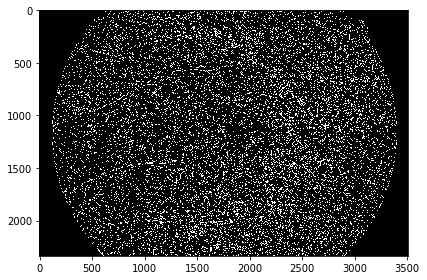

In [123]:
showImage(canny2)

In [96]:
alpha = 2
beta = 10


In [97]:
contrast = alpha*gray + beta

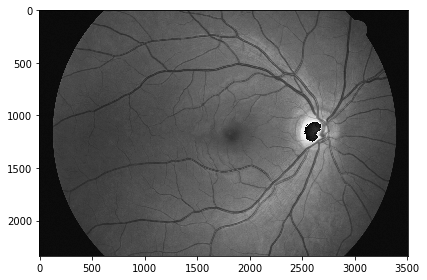

In [98]:
showImage(contrast)

In [99]:
th2 = cv.adaptiveThreshold(contrast,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)

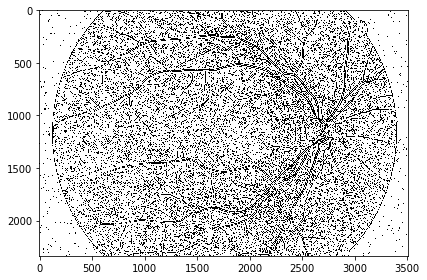

In [100]:
showImage(th2)